In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as ms

In [5]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [73]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [74]:
train.shape

(43400, 12)

In [75]:
test.shape

(18601, 11)

Data Cleaning

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18601 non-null  int64  
 1   gender             18601 non-null  object 
 2   age                18601 non-null  float64
 3   hypertension       18601 non-null  int64  
 4   heart_disease      18601 non-null  int64  
 5   ever_married       18601 non-null  object 
 6   work_type          18601 non-null  object 
 7   Residence_type     18601 non-null  object 
 8   avg_glucose_level  18601 non-null  float64
 9   bmi                18010 non-null  float64
 10  smoking_status     12850 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.6+ MB


In [78]:
train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [79]:
test.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

<AxesSubplot:>

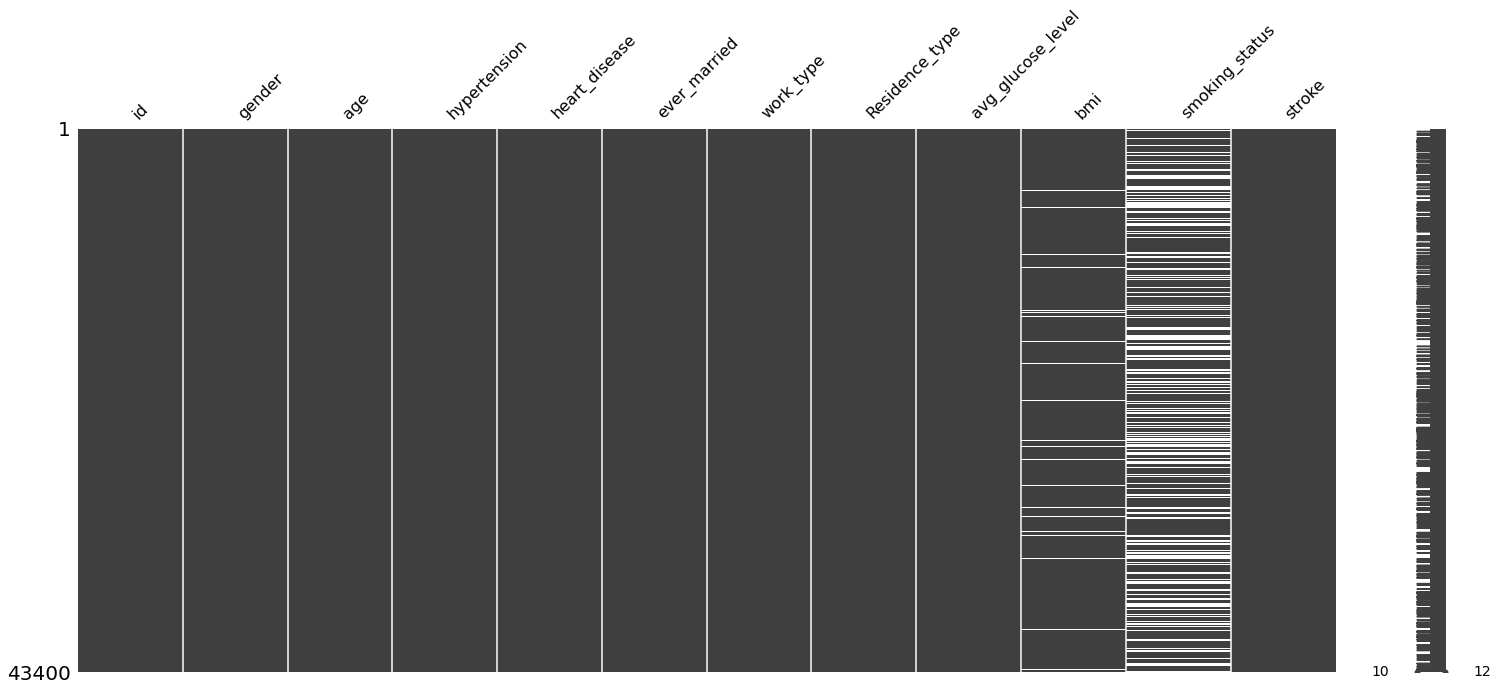

In [80]:
ms.matrix(train)

In [81]:
train["smoking_status"].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [7]:
train["work_type"].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [83]:
cat_cols=[cols for cols in train if train[cols].dtype=='O']
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [90]:
train['smoking_status']=train['smoking_status'].fillna(train['smoking_status'].mode())[0]
train['bmi']=train['bmi'].fillna(train['bmi'].mode())[0]

In [91]:
train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Pattern Recongnition

In [92]:
train["stroke"].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

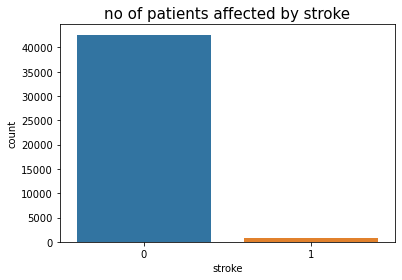

In [93]:
sns.countplot(x=train["stroke"])
plt.title("no of patients affected by stroke", fontsize=15)
plt.show()

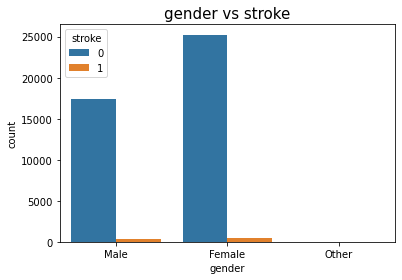

In [94]:
sns.countplot(x=train["gender"],hue=train["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

In [95]:
train.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         25234
        1           431
Male    0         17372
        1           352
Other   0            11
Name: stroke, dtype: int64

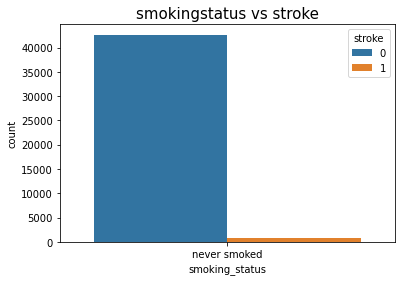

In [96]:
sns.countplot(x=train["smoking_status"],hue=train["stroke"])
plt.title("smokingstatus vs stroke", fontsize=15)
plt.show()

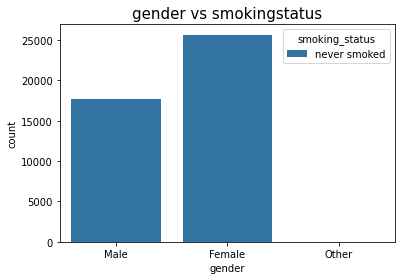

In [97]:
sns.countplot(x=train["gender"],hue=train["smoking_status"])
plt.title("gender vs smokingstatus", fontsize=15)
plt.show()

In [98]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for feature in cat_cols:
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.fit_transform(test[feature])

In [99]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0,0
1,30468,1,58.0,1,0,1,2,1,87.96,18.0,0,0
2,16523,0,8.0,0,0,0,2,1,110.89,18.0,0,0
3,56543,0,70.0,0,0,1,2,0,69.04,18.0,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,18.0,0,0


In [100]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,1,80.0,0,0,1,2,1,83.84,21.1,0
1,61829,0,74.0,0,1,1,3,0,179.50,26.0,0
2,14152,0,14.0,0,0,0,4,0,95.16,21.2,3
3,12997,1,28.0,0,0,0,2,1,94.76,23.4,3
4,40801,0,63.0,0,0,1,0,0,83.57,27.6,1


Model building

In [101]:
xtr=train.drop(["stroke"],axis=1)
ytr=train["stroke"]

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtr,ytr)

Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
NB_model=GaussianNB()
NB_model.fit(x_train,y_train)

GaussianNB()

In [115]:
predict=NB_model.predict(x_test)


In [116]:
test_score=NB_model.score(x_test,y_test)
print("NB test score:",test_score)

NB test score: 0.9715207373271889


In [117]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10665
           1       0.15      0.14      0.14       185

    accuracy                           0.97     10850
   macro avg       0.57      0.56      0.56     10850
weighted avg       0.97      0.97      0.97     10850

[[10515   150]
 [  159    26]]


In [118]:
nb_cm = pd.crosstab(y_test,predict)
nb_cm

col_0,0,1
stroke,,
0,10515,150
1,159,26


Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
DT_mod=DecisionTreeClassifier()
DT_mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
pred=DT_mod.predict(x_test)

In [121]:
dt_score=DT_mod.score(x_test,y_test)
print("Decision tress score:",dt_score)

Decision tress score: 0.9653456221198157


In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10665
           1       0.08      0.10      0.09       185

    accuracy                           0.97     10850
   macro avg       0.53      0.54      0.54     10850
weighted avg       0.97      0.97      0.97     10850

[[10455   210]
 [  166    19]]


In [123]:
dt_cm = pd.crosstab(y_test,pred)
dt_cm

col_0,0,1
stroke,,
0,10455,210
1,166,19


Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rfc_mod=RandomForestClassifier(n_estimators=100)
rfc_mod.fit(x_train,y_train)

RandomForestClassifier()

In [128]:
y_pred=rfc_mod.predict(x_test)

In [129]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10665
           1       0.00      0.00      0.00       185

    accuracy                           0.98     10850
   macro avg       0.49      0.50      0.50     10850
weighted avg       0.97      0.98      0.97     10850

[[10663     2]
 [  185     0]]


Neural nets

In [130]:
from sklearn.model_selection import cross_val_score

In [134]:
cross_val_score(NB_model,x_train,y_train,cv=20,scoring='accuracy').mean()

0.9692778421266434

In [135]:
cross_val_score(DT_mod,x_train,y_train,cv=20,scoring='accuracy').mean()

0.9617510635181195

In [136]:
cross_val_score(rfc_mod,x_train,y_train,cv=20,scoring='accuracy').mean()

0.9815361060059894

PCA

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
prcomp = pca.fit_transform(x_train)

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtr,ytr)

In [142]:
mod1=GaussianNB()
mod1.fit(x_train,y_train)

GaussianNB()

In [144]:
ts=mod1.score(x_test,y_test)
ts

0.9700460829493087

In [148]:
mod2=DecisionTreeClassifier()
mod2.fit(x_train,y_train)

DecisionTreeClassifier()

In [149]:
dts=mod2.score(x_test,y_test)
dts

0.9652534562211982

In [151]:
mod3=RandomForestClassifier(n_estimators=100)
mod3.fit(x_train,y_train)


RandomForestClassifier()

In [152]:
rts=mod3.score(x_test,y_test)
rts

0.9814746543778802